In [18]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
from PIL import Image

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import make_s_curve
from mpl_toolkits.mplot3d import Axes3D

from sklearn.manifold import TSNE
from sklearn.datasets import load_digits


### Tarea 1 Reducción de Dimensionalidad

##### Fecha de entrega: subir la tarea a su repositorio de github antes del lunes 26 de octubre de 2020.


 1. Elije una imagen de tu elección y aplica SVD para reducir dimensionalidad

	a) Considerando que tu imagen está representada en una matriz de dimensión nxm y rank = r, elije k < r de tal forma que la matriz que se obtiene con la descompisción SVD tenga rango k y que se cumpla que:
$$\frac{\parallel A_{r} - B_{k}\parallel_{F}}{\parallel A_{r} \parallel_{F}} \leq 0.1$$

	donde $\parallel \cdot \parallel_{F}$ representa la norma de Frobenius y  se calcula de la siguiente manera:
$\parallel X \parallel_{F} = ( \displaystyle \sum_{i=1}^{n}\sum_{j=1}^{m}x_{ij}^{2}) ^{\frac{1}{2}}$ es decir, es la raíz de la suma de todos los elementos al cuadrado de la matriz.

	b) Graficar la matriz de la imagen original y la matriz con rank = k

In [2]:
imagen = Image.open('../data/unicorn-horse-drawing-clip-art-unicorn.jpg')
imagen_gris = imagen.convert('LA')

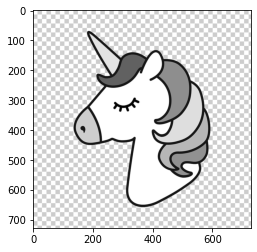

In [3]:
## Convertir la imagen a una matriz

imagen_mat = np.array(list(imagen_gris.getdata(band=0)), float)
imagen_mat.shape = (imagen_gris.size[1], imagen_gris.size[0])
imagen_mat = np.matrix(imagen_mat)

plt.imshow(imagen_mat, cmap='gray')

In [5]:
imagen_mat.shape

(728, 728)

In [6]:
U, Sigma, Vt = np.linalg.svd(imagen_mat, full_matrices=False)

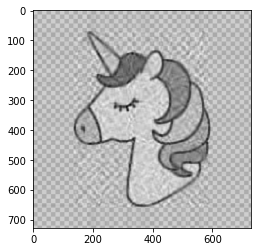

In [15]:
j = 25
matriz_equivalente = np.matrix(U[:, :j]) * np.diag(Sigma[:j]) * np.matrix(Vt[:j, :])
plt.imshow(matriz_equivalente, cmap='gray')

In [16]:
np.linalg.norm(matriz_equivalente-imagen_mat)/np.linalg.norm(imagen_mat) <= .1

True

2. A la misma imagen del ejercicio 1, aplicar PCA

	a) Conservar k componentes principales de tal forma que expliquen al menos el 80% de la varianza total.

In [28]:
def PCA_from_SVD(A):
    """
    Función para PCA a partir de la SVD de numpy 
    params: A			matriz de datos
    return: valores_singulares	Los valores singulares de la descomposición SVD
	    componentes		Los coeficientes para calcular los componentes principales
	    Z			Los datos transformados (componentes principales)
	    varianza_explicada	La varianza explicada por cada componente principal
    """
    
    # Centrar los datos
    A = np.array(A) # convertir los datos a un numpy array por si vienen de un DataFrame
    A_centered = A - A.mean(axis=0)
    
    # Calcular SVD
    U, S, Vt = np.linalg.svd(A_centered, full_matrices=False)
    
    # Los valores singulares
    valores_singulares = S
    
    # Los componentes (coeficientes)
    componentes = ((Vt.T))
    
    # Los datos transformados (componentes principales)
    Z = A_centered@np.transpose(Vt)
    
    # La varianza explicada
    varianza_explicada = S**2/np.sum(S**2)
    
   
    # regresar 4 objetos
    return valores_singulares, componentes.T, Z, varianza_explicada


In [29]:
# Ejecutar función
valores_singulares, coeficientes, Z, varianza_explicada = PCA_from_SVD(imagen_mat)

In [30]:
valores_singulares

array([1.53586779e+04, 1.40429477e+04, 1.26742919e+04, 1.00508243e+04,
       9.32593964e+03, 7.89266313e+03, 7.58596542e+03, 6.75081285e+03,
       6.56656331e+03, 6.52872251e+03, 5.59720580e+03, 5.50767107e+03,
       5.29799344e+03, 5.17981069e+03, 5.04572856e+03, 4.79949244e+03,
       4.55108727e+03, 4.32700942e+03, 4.21439385e+03, 4.10524589e+03,
       3.97886415e+03, 3.88706629e+03, 3.69940717e+03, 3.65325775e+03,
       3.45396779e+03, 3.41264433e+03, 3.23064243e+03, 3.15888806e+03,
       3.04239737e+03, 2.95131283e+03, 2.87343631e+03, 2.73536825e+03,
       2.68908847e+03, 2.55034174e+03, 2.49766550e+03, 2.45374063e+03,
       2.37735572e+03, 2.34072086e+03, 2.30991583e+03, 2.23829866e+03,
       2.07636782e+03, 2.03536361e+03, 2.00275887e+03, 1.95217112e+03,
       1.86118098e+03, 1.80775784e+03, 1.74162604e+03, 1.66157452e+03,
       1.63035528e+03, 1.60170076e+03, 1.59079645e+03, 1.53914582e+03,
       1.44459601e+03, 1.41495692e+03, 1.34835221e+03, 1.33190081e+03,
      

In [31]:
coeficientes

array([[ 0.0238685 ,  0.0238685 ,  0.0238685 , ...,  0.0238685 ,
         0.0238685 ,  0.0238685 ],
       [-0.03949045, -0.03949045, -0.03949045, ..., -0.03949045,
        -0.03949045, -0.03949045],
       [ 0.00254269,  0.00254269,  0.00254269, ...,  0.00254269,
         0.00254269,  0.00254269],
       ...,
       [ 0.        ,  0.1022903 ,  0.00052208, ..., -0.07940448,
        -0.10671757, -0.03849651],
       [ 0.        , -0.04263541, -0.06003939, ...,  0.0189403 ,
        -0.0535388 , -0.05712246],
       [ 0.        , -0.00061324,  0.01279823, ...,  0.09119024,
         0.12875009,  0.02833814]])

In [32]:
Z

array([[ 6.95845662e+02, -3.54832468e+02, -3.53737597e+02, ...,
         9.23705556e-14, -4.17443857e-14,  8.88178420e-15],
       [ 6.95845662e+02, -3.54832468e+02, -3.53737597e+02, ...,
         9.23705556e-14, -4.17443857e-14,  8.88178420e-15],
       [ 6.95845662e+02, -3.54832468e+02, -3.53737597e+02, ...,
         9.23705556e-14, -4.17443857e-14,  8.88178420e-15],
       ...,
       [ 6.95845662e+02, -3.54832468e+02, -3.53737597e+02, ...,
         9.23705556e-14, -4.17443857e-14,  8.88178420e-15],
       [ 6.95845662e+02, -3.54832468e+02, -3.53737597e+02, ...,
         9.23705556e-14, -4.17443857e-14,  8.88178420e-15],
       [ 6.95845662e+02, -3.54832468e+02, -3.53737597e+02, ...,
         9.23705556e-14, -4.17443857e-14,  8.88178420e-15]])

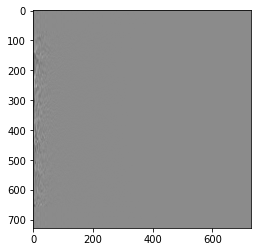

In [34]:
plt.imshow(Z, cmap='gray')

In [33]:
varianza_explicada

array([1.50495546e-01, 1.25815033e-01, 1.02485728e-01, 6.44494687e-02,
       5.54882693e-02, 3.97432256e-02, 3.67145065e-02, 2.90755618e-02,
       2.75101051e-02, 2.71939566e-02, 1.99875025e-02, 1.93531637e-02,
       1.79076588e-02, 1.71176347e-02, 1.62429066e-02, 1.46962524e-02,
       1.32143652e-02, 1.19451515e-02, 1.13314691e-02, 1.07521256e-02,
       1.01002983e-02, 9.63961909e-03, 8.73132687e-03, 8.51484226e-03,
       7.61118966e-03, 7.43015774e-03, 6.65876615e-03, 6.36626117e-03,
       5.90538005e-03, 5.55707770e-03, 5.26767689e-03, 4.77361712e-03,
       4.61345362e-03, 4.14966212e-03, 3.98001334e-03, 3.84125631e-03,
       3.60582229e-03, 3.49554768e-03, 3.40414688e-03, 3.19633322e-03,
       2.75058175e-03, 2.64301721e-03, 2.55901779e-03, 2.43137389e-03,
       2.21000466e-03, 2.08495403e-03, 1.93519973e-03, 1.76139040e-03,
       1.69582287e-03, 1.63673639e-03, 1.61452659e-03, 1.51138641e-03,
       1.33140076e-03, 1.27732794e-03, 1.15990570e-03, 1.13177409e-03,
      

In [19]:
pca = PCA(n_components=4,svd_solver='full')
pca.fit(imagen_mat)

PCA(n_components=4, svd_solver='full')

In [20]:
# eigenvalores
pca.singular_values_

array([15358.67794446, 14042.9477136 , 12674.2919451 , 10050.82430478])

In [21]:
# coeficientes de los componentes
print(pca.components_)

[[-0.0238685  -0.0238685  -0.0238685  ... -0.0238685  -0.0238685
  -0.0238685 ]
 [ 0.03949045  0.03949045  0.03949045 ...  0.03949045  0.03949045
   0.03949045]
 [ 0.00254269  0.00254269  0.00254269 ...  0.00254269  0.00254269
   0.00254269]
 [-0.00151127 -0.00151127 -0.00151127 ... -0.00151127 -0.00151127
  -0.00151127]]


In [22]:
tabla_z = pca.transform(imagen_mat)
print(tabla_z)

[[-695.84566174  354.83246769 -353.7375971   -49.50144069]
 [-695.84566174  354.83246769 -353.7375971   -49.50144069]
 [-695.84566174  354.83246769 -353.7375971   -49.50144069]
 ...
 [-695.84566174  354.83246769 -353.7375971   -49.50144069]
 [-695.84566174  354.83246769 -353.7375971   -49.50144069]
 [-695.84566174  354.83246769 -353.7375971   -49.50144069]]


In [23]:
# Varianza explicada
print(pca.explained_variance_ratio_)

[0.15049555 0.12581503 0.10248573 0.06444947]


In [24]:
# Reconstruir la matriz de datos X
pca.components_.T@(np.diag(pca.singular_values_))@pca.components_ / 150

array([[0.20503156, 0.20503156, 0.20503156, ..., 0.20503156, 0.20503156,
        0.20503156],
       [0.20503156, 0.20503156, 0.20503156, ..., 0.20503156, 0.20503156,
        0.20503156],
       [0.20503156, 0.20503156, 0.20503156, ..., 0.20503156, 0.20503156,
        0.20503156],
       ...,
       [0.20503156, 0.20503156, 0.20503156, ..., 0.20503156, 0.20503156,
        0.20503156],
       [0.20503156, 0.20503156, 0.20503156, ..., 0.20503156, 0.20503156,
        0.20503156],
       [0.20503156, 0.20503156, 0.20503156, ..., 0.20503156, 0.20503156,
        0.20503156]])

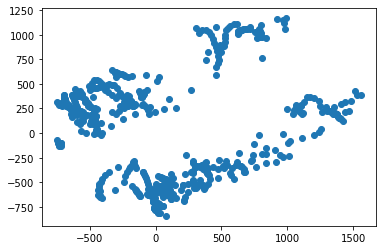

In [27]:
#from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(imagen_mat)
X_pca = pca.transform(imagen_mat)
plt.close()
plt.scatter(X_pca[:,0], X_pca[:,1], cmap=plt.cm.Spectral)

3. Calcular la pseudo inversa de las siguientes matrices:

    a) $X_{1} =\left(
\begin{array}{ll}
1 & 0 \\
1   & 2
\end{array}
\right)$

    b) $X_{2} =\left(
\begin{array}{ll}
1 & 0  & 8\\
1   & 2 & -1
\end{array}
\right)$

In [35]:
def pseudoinversa(M):
    U, S, Vt = np.linalg.svd(M, full_matrices = True)
    peudoinversa =  Vt.T@(np.diag(1/S))@U.T
    return peudoinversa

In [37]:
X1 =  np.array([[1,0],[1,2]])
X1

array([[1, 0],
       [1, 2]])

In [53]:
pseudo1 = np.around(pseudoinversa(X1),3)
pseudo1

array([[ 1. ,  0. ],
       [-0.5,  0.5]])

In [44]:
np.linalg.inv(X1)

array([[ 1. ,  0. ],
       [-0.5,  0.5]])

In [54]:
X1@pseudo1

array([[1., 0.],
       [0., 1.]])

In [45]:
X2 =  np.array([[1,0,8],[1,2,-1]])

In [55]:
# como m<n, (rango fila completo)
#la pseudo inversa está dada por
pseudo2 = X2.T@np.linalg.inv(X2@X2.T)
pseudo2

array([[ 0.03812317,  0.2111437 ],
       [ 0.04105572,  0.38123167],
       [ 0.1202346 , -0.02639296]])

In [60]:
np.around(X2@pseudo2,4)

array([[ 1., -0.],
       [ 0.,  1.]])



    
    




4. Resolver los siguientes sistemas de ecuaciones $Ax = b$. Tip: al igual que en el ejercico anterior, utilizar la pseudo inversa.

    a) $A =\left(
\begin{array}{ll}
1 & 0  & 8\\
1   & 2 & -1
\end{array}
\right)$, $b =\left(
\begin{array}{ll}
2  \\
1
\end{array}
\right)$

    

In [61]:
A =  np.array([[1,0,8],[1,2,-1]])
b = np.array([[2],[1]])

In [72]:
A

array([[ 1,  0,  8],
       [ 1,  2, -1]])

In [73]:
b

array([[2],
       [1]])

In [86]:
A.T@A

array([[ 2,  2,  7],
       [ 2,  4, -2],
       [ 7, -2, 65]])

In [95]:
psA = A.T@np.linalg.inv(A@A.T)

In [97]:
x = psA@b

In [98]:
A@x

array([[2.],
       [1.]])

 b) $A = \left(
\begin{array}{ll}
1 & 1\\
0 & 0 
\end{array}
\right)$,  $b =\left(
\begin{array}{ll}
1  \\
1
\end{array}
\right)$  Notar que $b$ no está en la imagen de $A$ 

In [100]:
A =  np.array([[1,1],[0,0]])
b = np.array([[1],[1]])

In [101]:
A

array([[1, 1],
       [0, 0]])

In [102]:
b

array([[1],
       [1]])



5. Probar que para una matriz que se puede descomponer en el producto de 3 matrices de la siguiente forma $D=Q \Lambda Q^{T}$ con $Q$ una matriz ortogonal y $\Lambda$ una matriz diagonal, entonces se cumple que la k-ésima potendia de $D$ es $D^{k}=Q \Lambda^{k} Q^{T}$





 $D^{k}=D*D...*D (k veces) = Q \Lambda Q^{T}*Q \Lambda Q^{T}*...*Q \Lambda Q^{T}=Q \Lambda Q^{-1}*Q \Lambda Q^{-1}*...*Q \Lambda Q^{-1}= Q*\Lambda^{k}*Q^{-1}$

Usamos que Q es ortogonal, $Q^{-1}=Q^{T}$ y que el producto de matrices es asociativo, eliminamos las matrices identidades que se formaban dentro.